# Linear (with polynomial) Regression

Pros of vectorization:

 - mode compact equations
 - faster code execution

Used literature: 
 - [Vectorization Implementation in Machine Learning](https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d)
 - [courses.cs.washington.edu](https://courses.cs.washington.edu/courses/cse446/20wi/Lecture8/08_Regularization.pdf)

Import dependencies.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Create fake train and test sets with sinusoidal function.

In [35]:
def func(x):
    return np.sin(x) + np.random.normal(0, 0.5, len(x))

In [36]:
x_train = np.arange(0, np.pi * 2, 0.2)
y_train = func(x_train)

x_val = np.arange(0, np.pi * 2, 0.3)
y_val = func(x_val)

x_test = np.arange(0, np.pi * 2, 0.3)
y_test = func(x_test)

Function `plot_model` to splot all certain points.

In [37]:
def plot_model(x_train, y_train, x_val=None, y_val=None, w=None, M=None):
    plt.scatter(x_train, y_train, marker='x', c='blue', s=25)
    plt.scatter(x_val, y_val, marker='x', c='red', s=25)
    
    if M:
        x = np.arange(0, np.pi * 2, 0.1)
        y = hypothesis(x, w, M)
        plt.plot(x, y, c='red')
    
    plt.show()

#### Design matrix

The design matrix is used in certain statistical models, e.g. the general linear model.

In [38]:
def design_matrix(x, M):
    return np.mat([[i ** p for p in range(M + 1)] for i in x])

#### Equation function

Use it to get equation points in the future to plot a model.

In [39]:
def hypothesis(x, w, M):
    return design_matrix(x, M) * w

#### Error function

Use Mean Squared Error to define a total error between predictions and real data.

In [40]:
def mean_squared_error(X, Y, w, M):
    return np.square(np.mat(Y).T - hypothesis(X, w, M)).mean()

Main loop with 10k iterations.

 - l - learning rate.
 - M - degree of polynomial.
 - w - parameters of equation.

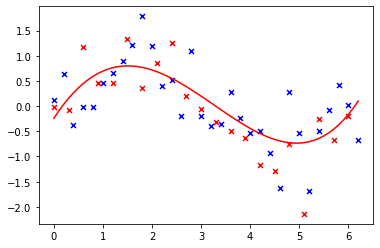

Wall time: 318 ms


'Best model: M = 4, error = 0.2399753766890157'

In [41]:
%%time
M = 8

models = []
for m in range(M + 1):
    X = design_matrix(x_train, m)
    w = np.linalg.inv(X.T @ X) @ X.T @ np.mat(y_train).T
    models.append([w, mean_squared_error(x_val, y_val, w, m), m])

bm = min(models, key=lambda x: x[1])
plot_model(x_train, y_train, x_val, y_val, bm[0], bm[2])

f'Best model: M = {bm[2]}, error = {bm[1]}'

## with Regularization

Tikhonov-regularized least squares.

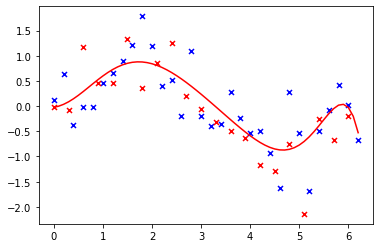

Wall time: 459 ms


'Best model: M = 8, error = 0.23486802854595817, lambda = 0.3'

In [42]:
%%time
M = 8
lmbd = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

models = []
for lambda_ in lmbd:
    for m in range(M + 1):
        X = design_matrix(x_train, m)
        w = np.linalg.inv(X.T @ X + lambda_ * np.identity(m + 1)) @ X.T @ np.mat(y_train).T
        models.append([w, mean_squared_error(x_val, y_val, w, m), m, lambda_])

bm = min(models, key=lambda x: x[1])
plot_model(x_train, y_train, x_val, y_val, bm[0], bm[2])

f'Best model: M = {bm[2]}, error = {bm[1]}, lambda = {bm[3]}'